In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_csv('/content/diabetes.csv')

In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [48]:
data.shape

(768, 9)

In [49]:
data.isnull().sum()

Pregnancies                 0
Glucose                     4
BloodPressure               3
SkinThickness               2
Insulin                     6
BMI                         4
DiabetesPedigreeFunction    3
Age                         2
Outcome                     0
dtype: int64

In [50]:
col_list = ['SkinThickness', 'Age']
data1 = data.dropna(subset=col_list, how='any', axis=0)

In [51]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     3
BloodPressure               3
SkinThickness               0
Insulin                     6
BMI                         4
DiabetesPedigreeFunction    3
Age                         0
Outcome                     0
dtype: int64

In [52]:
data1.fillna(data1.mean(), inplace=True)

<ipython-input-52-2e92c4fe4f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.fillna(data1.mean(), inplace=True)


In [53]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
data1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132789,0.140908,-0.075461,-0.071322,0.017797,-0.023261,0.544459,0.222587
Glucose,0.132789,1.000000,0.154934,0.054551,0.335007,0.217204,0.128076,0.268286,0.461375
BloodPressure,0.140908,0.154934,1.000000,0.208794,0.089330,0.279750,0.043964,0.239823,0.065487
SkinThickness,-0.075461,0.054551,0.208794,1.000000,0.435784,0.392815,0.182063,-0.111779,0.074738
Insulin,-0.071322,0.335007,0.089330,0.435784,1.000000,0.196761,0.186787,-0.042296,0.132213
BMI,0.017797,0.217204,0.279750,0.392815,0.196761,1.000000,0.134487,0.036288,0.289185
DiabetesPedigreeFunction,-0.023261,0.128076,0.043964,0.182063,0.186787,0.134487,1.000000,0.040482,0.168145
Age,0.544459,0.268286,0.239823,-0.111779,-0.042296,0.036288,0.040482,1.000000,0.240556
Outcome,0.222587,0.461375,0.065487,0.074738,0.132213,0.289185,0.168145,0.240556,1.000000


In [55]:
data1.shape

(764, 9)

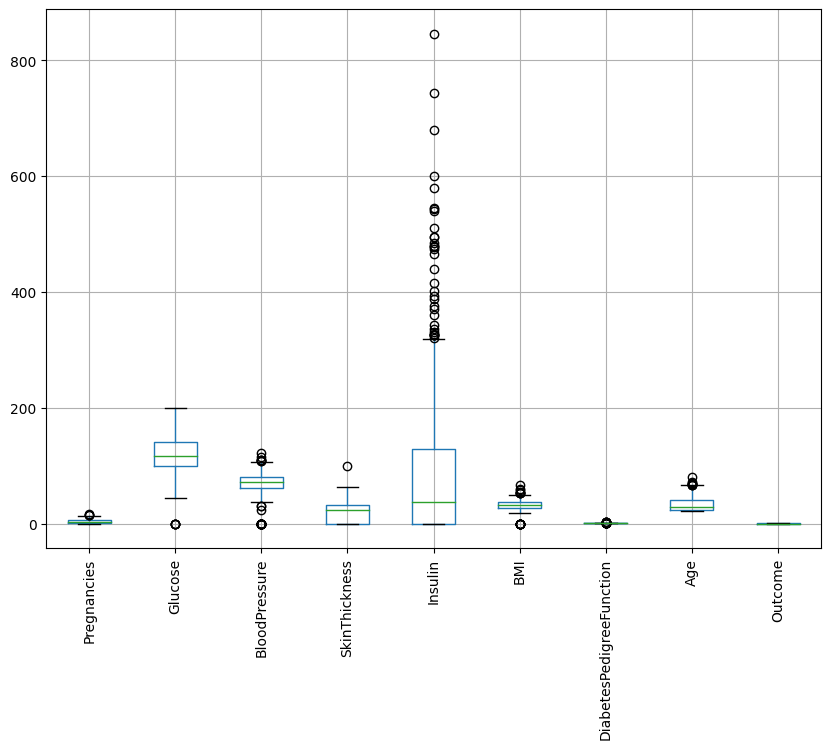

In [56]:
# prompt: create box plot of large image for data1

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
data1.boxplot()
plt.xticks(rotation=90)
plt.show()

In [57]:
# prompt: finds outlier with IQR

Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

outliers = data1[((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR)))]
print(outliers.shape)


(764, 9)


In [58]:
# prompt: remove outliers

# Remove outliers
data_cleaned = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the cleaned data
print(data_cleaned.shape)

(634, 9)


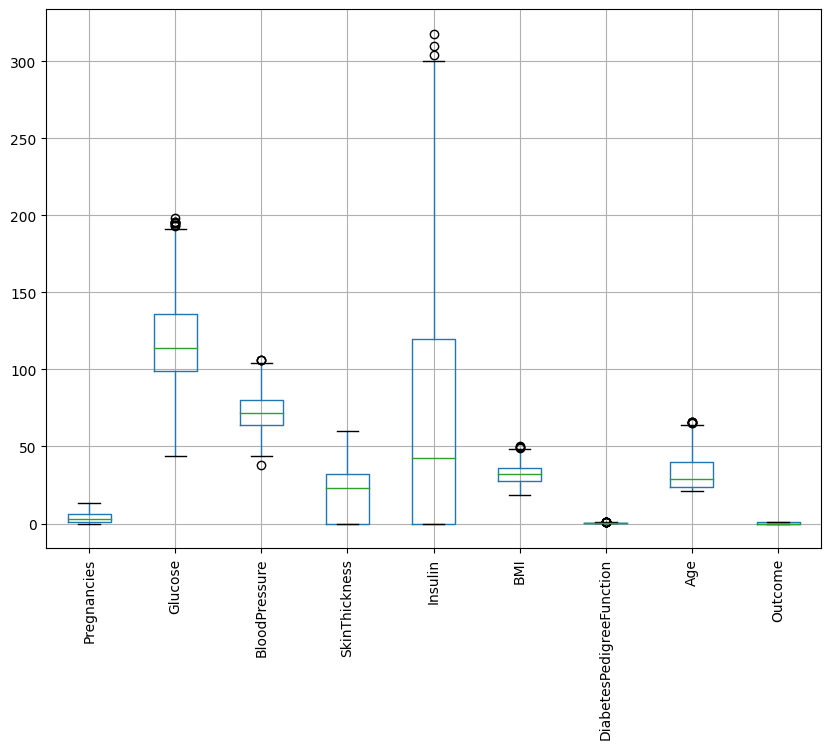

In [59]:
# prompt: generate of boxplot of large size for data_cleaned

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
data_cleaned.boxplot()
plt.xticks(rotation=90)
plt.show()

In [60]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0


In [61]:
data_cleaned.shape

(634, 9)

<ipython-input-62-762dcd802ee6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Pregnancies'], ax=axes[0])
<ipython-input-62-762dcd802ee6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Glucose'], ax=axes[1])
<ipython-input-62-762dcd802ee6>:10: UserWarning: 

`dist

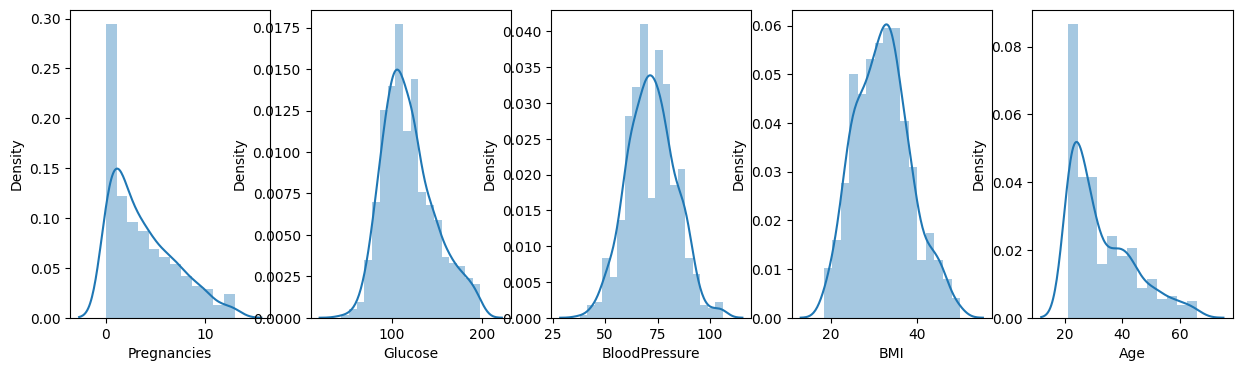

In [62]:
# prompt: create diskplot for all columns

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.distplot(data_cleaned['Pregnancies'], ax=axes[0])
sns.distplot(data_cleaned['Glucose'], ax=axes[1])
sns.distplot(data_cleaned['BloodPressure'], ax=axes[2])
sns.distplot(data_cleaned['BMI'], ax=axes[3])
sns.distplot(data_cleaned['Age'], ax=axes[4])

plt.show()

In [63]:
# prompt: apply log transformation for Pregnancies, Glucose,  BloodPressure,  BMI, Age

import numpy as np

data_cleaned['Pregnancies'] = np.log(data_cleaned['Pregnancies'] + 1)
data_cleaned['Glucose'] = np.log(data_cleaned['Glucose'] + 1)
data_cleaned['BloodPressure'] = np.log(data_cleaned['BloodPressure'] + 1)
data_cleaned['BMI'] = np.log(data_cleaned['BMI'] + 1)
data_cleaned['Age'] = np.log(data_cleaned['Age'] + 1)


<ipython-input-63-bd0af228dc13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Pregnancies'] = np.log(data_cleaned['Pregnancies'] + 1)
<ipython-input-63-bd0af228dc13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Glucose'] = np.log(data_cleaned['Glucose'] + 1)
<ipython-input-63-bd0af228dc13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

<ipython-input-64-5f3a1dd07887>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Pregnancies'], ax=axes[0])
<ipython-input-64-5f3a1dd07887>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Glucose'], ax=axes[1])
<ipython-input-64-5f3a1dd07887>:8: UserWarning: 

`distp

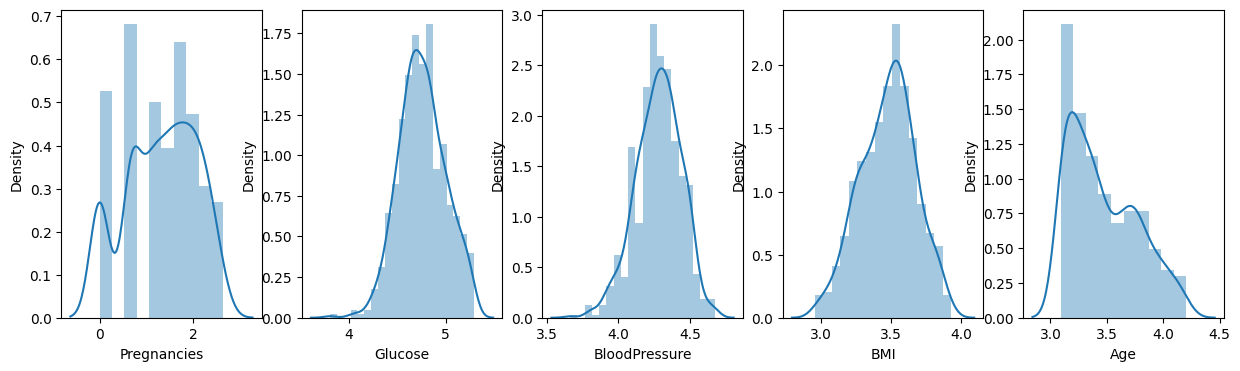

In [64]:
# prompt: plot 5 graphs of above columns log transformations

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.distplot(data_cleaned['Pregnancies'], ax=axes[0])
sns.distplot(data_cleaned['Glucose'], ax=axes[1])
sns.distplot(data_cleaned['BloodPressure'], ax=axes[2])
sns.distplot(data_cleaned['BMI'], ax=axes[3])
sns.distplot(data_cleaned['Age'], ax=axes[4])

plt.show()


In [65]:
# prompt: apply sqrt transformation for Pregnancies, Glucose,  BloodPressure,  BMI, Age

import numpy as np
data_cleaned['Pregnancies'] = np.sqrt(data_cleaned['Pregnancies'])
data_cleaned['Glucose'] = np.sqrt(data_cleaned['Glucose'])
data_cleaned['BloodPressure'] = np.sqrt(data_cleaned['BloodPressure'])
data_cleaned['BMI'] = np.sqrt(data_cleaned['BMI'])
data_cleaned['Age'] = np.sqrt(data_cleaned['Age'])


<ipython-input-65-9c81fe4f9bb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Pregnancies'] = np.sqrt(data_cleaned['Pregnancies'])
<ipython-input-65-9c81fe4f9bb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Glucose'] = np.sqrt(data_cleaned['Glucose'])
<ipython-input-65-9c81fe4f9bb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-66-bbeffe3f852a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Pregnancies'], ax=axes[0])
<ipython-input-66-bbeffe3f852a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Glucose'], ax=axes[1])
<ipython-input-66-bbeffe3f852a>:8: UserWarning: 

`distp

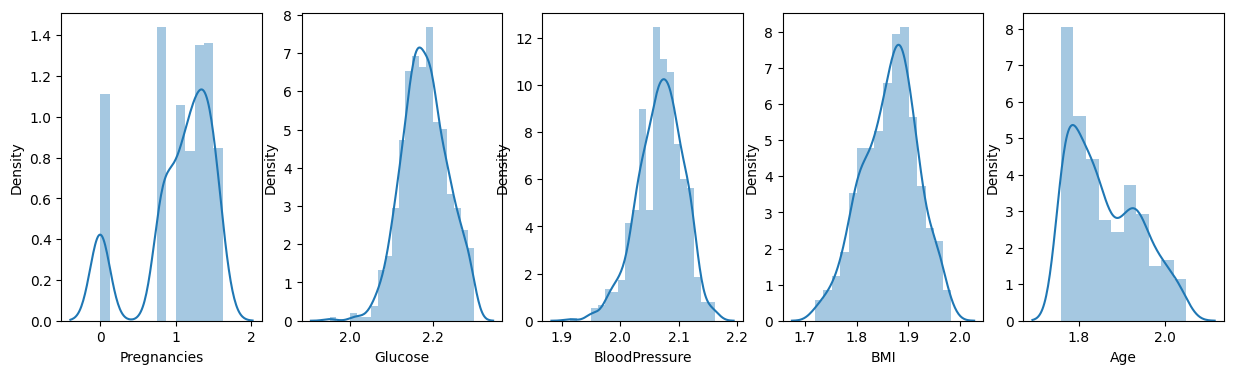

In [66]:
# prompt: plot 5 graphs of above columns sqrt transformations

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.distplot(data_cleaned['Pregnancies'], ax=axes[0])
sns.distplot(data_cleaned['Glucose'], ax=axes[1])
sns.distplot(data_cleaned['BloodPressure'], ax=axes[2])
sns.distplot(data_cleaned['BMI'], ax=axes[3])
sns.distplot(data_cleaned['Age'], ax=axes[4])

plt.show()


In [74]:
data_cleaned.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.394959,2.236950,2.071342,35.0,0.00000,1.882513,0.627000,1.982883,1
1,0.832555,2.110532,2.050535,29.0,0.00000,1.821487,0.351000,1.861649,0
2,1.482304,2.283623,2.043132,0.0,0.00000,1.786190,0.672000,1.869895,1
3,0.832555,2.121275,2.050535,23.0,94.00000,1.835957,0.167000,1.758136,0
5,1.338566,2.182241,2.077857,0.0,0.00000,1.811329,0.201000,1.853102,0
6,1.177410,2.090322,1.982883,32.0,88.00000,1.861649,0.248000,1.815444,1
10,1.268636,2.170145,2.128990,0.0,0.00000,1.911348,0.191000,1.853102,0
14,1.338566,2.262298,2.071342,19.0,175.00000,1.813395,0.587000,1.987774,1
16,0.000000,2.186121,2.107760,47.0,230.00000,1.961092,0.551000,1.861649,1
17,1.442027,2.163823,2.077857,0.0,0.00000,1.849595,0.254000,1.861649,1


In [84]:
data_cleaned.Outcome.value_counts()

Outcome
0    437
1    197
Name: count, dtype: int64

In [86]:
# prompt: handle imbalance class using smote

import pandas as pd
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(data_cleaned.drop('Outcome', axis=1), data_cleaned['Outcome'])
data_cleaned = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['Outcome'])], axis=1)
data_cleaned.Outcome.value_counts()

Outcome
1    437
0    437
Name: count, dtype: int64

In [118]:
data_cleaned.shape

(874, 9)

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [120]:
X = data_cleaned.values[:,0:7]
y = data_cleaned.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [121]:
myclassifier = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
myclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [122]:
y_pred = myclassifier.predict(X_test)

In [123]:
confusion_matrix(y_test, y_pred)

array([[87, 32],
       [45, 99]])

In [124]:
accuracy_score(y_test, y_pred)*100

70.72243346007605

In [125]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.66      0.73      0.69       119\n         1.0       0.76      0.69      0.72       144\n\n    accuracy                           0.71       263\n   macro avg       0.71      0.71      0.71       263\nweighted avg       0.71      0.71      0.71       263\n'

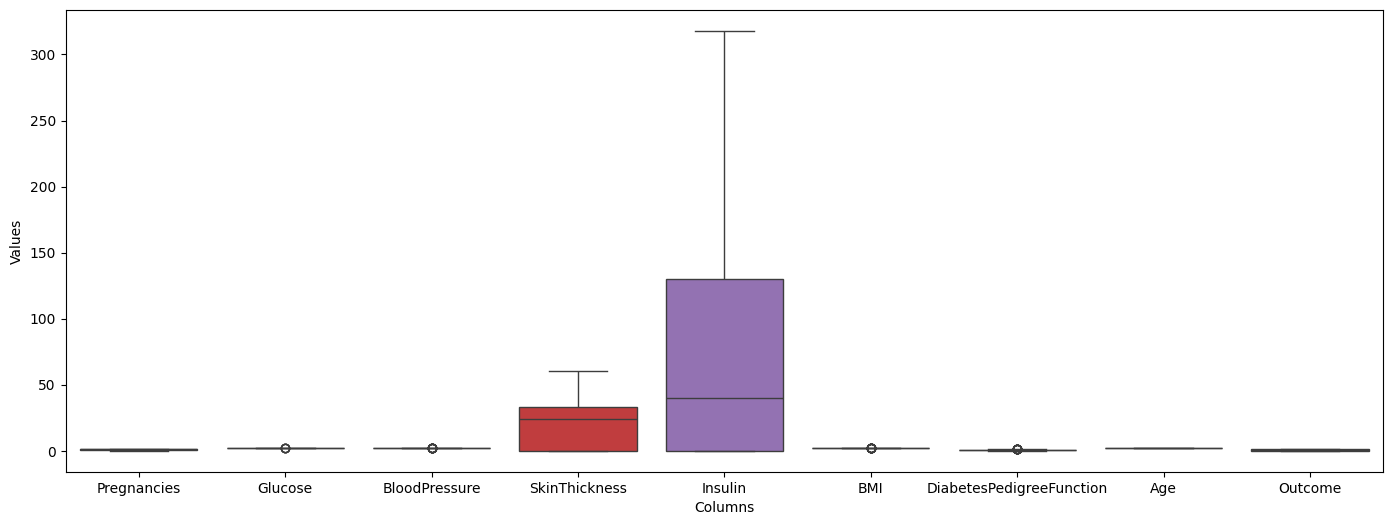

In [126]:
# prompt: create boxplot for all columns with big image

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(17, 6))

# Create the boxplot
sns.boxplot(data=data_cleaned)

# Set the x-axis label
plt.xlabel('Columns')

# Set the y-axis label
plt.ylabel('Values')

# Show the plot
plt.show()

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
myclassifier = GaussianNB()
myclassifier.fit(X_train, y_train)

GaussianNB()

In [130]:
y_pred = myclassifier.predict(X_test)

In [131]:
confusion_matrix(y_test, y_pred)

array([[92, 37],
       [40, 94]])

In [132]:
accuracy_score(y_test, y_pred)*100

70.72243346007605

In [133]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.70      0.71      0.70       129\n         1.0       0.72      0.70      0.71       134\n\n    accuracy                           0.71       263\n   macro avg       0.71      0.71      0.71       263\nweighted avg       0.71      0.71      0.71       263\n'